In [34]:
#(a) Load the data-set and replace all categorical values with numbers. (

import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from sklearn.metrics import zero_one_loss
from sympy import sin, cos, symbols, integrate
from sklearn.metrics import mean_squared_error

#load dataset(Hitters.csv)
df1 = pd.read_csv('Hitters.csv')
df1.dtypes

#convert datatype
df1['League'] = df1.League.astype('category')
df1['Division'] = df1.Division.astype('category')
df1['NewLeague'] = df1.NewLeague.astype('category')

lb_make = LabelEncoder()
df1.League = lb_make.fit_transform(df1.League)
df1.Division = lb_make.fit_transform(df1.Division)
df1.NewLeague = lb_make.fit_transform(df1.NewLeague)

In [35]:
#(b) Fit linear regression and report 10-Fold Cross-Validation mean squared error.

Y1 = df1['Salary']
X1 = df1.drop(['Salary'],axis=1)
def Validate(X,Y,model):
    kf = KFold(n_splits=10, random_state=0)
    kf.get_n_splits(X)
    mea_squared_error = []
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        # fit the model
        model.fit(X_train,y_train)
        # predict
        y_pred = model.predict(X_test)
        loss = mean_squared_error(y_test,y_pred)
        mea_squared_error.append(loss)
    return np.mean(mea_squared_error)

def TestModels(X,Y):

    model = linear_model.LinearRegression()
    err = Validate(X,Y,model)
    print("------------------------------------------------")   
    print("Multi Linear regression cross validation error = ", err)
    print("------------------------------------------------") 
 
    
    
def TestModels_add(X,Y):
    ##########################################################################
    alph_arr = np.arange(0,200,1)
    scores = list()
    for alph in alph_arr:
        model = linear_model.Lasso(alpha = alph)
        err = Validate(X,Y,model)
        scores.append(err)
        print(alph, " - ", err)
        print("------------------------------------------------")   
        #print("Multi Linear regression(Lasso method) cross validation error = ", err)
        print("------------------------------------------------") 
    plt.plot(alph_arr, scores)
    plt.ylabel('mean squared error')
    plt.xlabel('λ')
    plt.axhline(np.min(scores), linestyle='--', color='.5')
    alph_best = alph_arr[scores.index(np.min(scores))]
    print("Best alph value  = ", alph_best)
    print('corresponding mean squared error= ',np.min(scores))
    ##########################################################################  
    
    
def TestModels_add1(X,Y):
    ncomp = np.arange(1,20,1) # change the number of components
    scores = list()
    for ncom in ncomp:
        pca = PCA(n_components=ncom)
        X_pca = pca.fit_transform(X)
        model = linear_model.LinearRegression()
        err = Validate(pd.DataFrame(X_pca),Y,model)
        scores.append(err)
        print(ncom, " - ", err)
        print("------------------------------------------------")   
        #print("PCA cross validation error = ", err)
        print("------------------------------------------------") 
    plt.plot(ncomp, scores)
    plt.ylabel('mean squared error')
    plt.xlabel('ncom')
    plt.axhline(np.min(scores), linestyle='--', color='.5')
    PCA_best = ncomp[scores.index(np.min(scores))]
    print("Best n value  = ", PCA_best)
    print('Corresponding mean squared error= ',np.min(scores))



TestModels(X1,Y1)
    

------------------------------------------------
Multi Linear regression cross validation error =  116599.01367380246
------------------------------------------------


1  -  150520.25513470668
------------------------------------------------
------------------------------------------------
2  -  134819.979057635
------------------------------------------------
------------------------------------------------
3  -  135014.39630963778
------------------------------------------------
------------------------------------------------
4  -  124067.17250101396
------------------------------------------------
------------------------------------------------
5  -  126755.04426852029
------------------------------------------------
------------------------------------------------
6  -  128703.04514145222
------------------------------------------------
------------------------------------------------
7  -  122062.30508807325
------------------------------------------------
------------------------------------------------
8  -  122334.72921209867
------------------------------------------------
------------------------------------------------
9  -  120269.37814

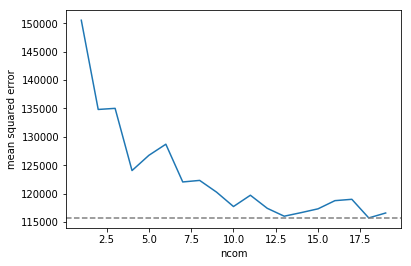

In [36]:
#(c) Apply Principal Component Regression (PCR)

TestModels_add1(X1,Y1)



0  -  116583.5700471041
------------------------------------------------
------------------------------------------------
1  -  116032.80802163859
------------------------------------------------
------------------------------------------------
2  -  115730.91998010843
------------------------------------------------
------------------------------------------------
3  -  115624.46080591362
------------------------------------------------
------------------------------------------------
4  -  115534.1729487543
------------------------------------------------
------------------------------------------------
5  -  115426.3543999154
------------------------------------------------
------------------------------------------------
6  -  115326.64561324338
------------------------------------------------
------------------------------------------------
7  -  115237.13914930867
------------------------------------------------
------------------------------------------------
8  -  115159.367509

68  -  114073.90927427527
------------------------------------------------
------------------------------------------------
69  -  114041.55767983795
------------------------------------------------
------------------------------------------------
70  -  114009.45061731448
------------------------------------------------
------------------------------------------------
71  -  113977.5828949343
------------------------------------------------
------------------------------------------------
72  -  113946.03115509723
------------------------------------------------
------------------------------------------------
73  -  113914.80653793525
------------------------------------------------
------------------------------------------------
74  -  113884.5547718455
------------------------------------------------
------------------------------------------------
75  -  113854.96506839039
------------------------------------------------
------------------------------------------------
76  -  113

134  -  113413.38485304813
------------------------------------------------
------------------------------------------------
135  -  113417.5300831692
------------------------------------------------
------------------------------------------------
136  -  113421.82324824242
------------------------------------------------
------------------------------------------------
137  -  113426.95639334875
------------------------------------------------
------------------------------------------------
138  -  113431.76474378277
------------------------------------------------
------------------------------------------------
139  -  113436.5109096788
------------------------------------------------
------------------------------------------------
140  -  113441.35307784684
------------------------------------------------
------------------------------------------------
141  -  113446.29009217731
------------------------------------------------
------------------------------------------------
14

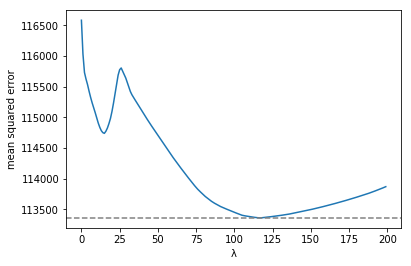

In [37]:
#Determine the best λ and the corresponding mean squared error

TestModels_add(X1,Y1)